#### Team members:
* adsouz2s
* pnaray2s
* prange2s
* sgeorg2s

# An Investigation of Simulators

In this exercise, you will explore the use of different simulators for setting up a robot and interacting with it on a simple point-to-point navigation task. We are particularly aiming to explore how the Robile can be set up and used in different simulators.

Each group will work with a different simulator (out of the ones we mentioned in the lecture). We will not use Gazebo in this exercise since you are already familiar with it --- one group will have an unfair advantage if we were to use it.

Here are some steps to follow during the assignment:
* After installing the respective simulator on your system, figure out what programming interface is available for it (what kind of API is there, can you use ROS, etc.).
* If the simulator supports URDF, import the Robile URDF directly; otherwise, find out whether the simulator uses another description language and whether there is a built-in URDF conversion utility. **Only if neither of the two conditions are satisfied, you can use a simple robot model that is available in the simulator.**
* Once you have a robot model, set up an environment for the robot (if URDF is supported, you can import one of the environments that we use in the Gazebo simulation).
* The final step is the most involved: **You need to write software so that you can send motion commands to the robot and perform obstacle avoidance**. During this step, particularly see how you can obtain laser measurements so that you can also perform obstacle avoidance (this should, in principle, be easy if the simulator supports ROS).

## Assignment Submission [90 points]

In the cell below, submit any code you develop in the assignment. Additionally, please submit a screen recorded video to demonstrate your robot in action (you can also upload the video externally, e.g. on Google Drive, and provide a link to it further below).

In [ ]:
### Add any code you have developed to control the robot in your simulator here

# YOUR CODE HERE


#!usr/bin/env python

import rclpy
from rclpy.node import Node

from sensor_msgs.msg import LaserScan
from geometry_msgs.msg import Twist

class AvoidCollision(Node):
    def __init__(self, safe_d=1):
        super().__init__('avoid_collision')
        self.subscription = self.create_subscription(
            LaserScan,
            '/scan',
            self.laser_callback,
            10
        )

        self.publisher = self.create_publisher(Twist, '/cmd_vel', 10)
        self.safe_distance = safe_d
    
    def laser_callback(self, msg):
        lidar_data = msg.ranges
        minimum_distance = min(lidar_data)
        self.get_logger().info("min distance: %f" % minimum_distance)
        if minimum_distance < self.safe_distance:
            self.stop()
        else:
            self.move()

    def stop(self, linear_x=0.0, angular_z=0.0):
        msg = Twist()
        msg.linear.x = linear_x
        msg.angular.z = angular_z
        self.publisher.publish(msg)
        self.get_logger().info('stopping robot')

    def move(self, linear_x=1.0, angular_z=0.0):
        msg = Twist()
        msg.linear.x = linear_x
        msg.angular.z = angular_z
        self.publisher.publish(msg)
        self.get_logger().info('moving')


def main(args=None):
    rclpy.init(args=args)
    avoid_collision = AvoidCollision()
    rclpy.spin(avoid_collision)
    avoid_collision.destroy_node()
    rclpy.shutdown()

if __name__ == '__main__':
    main()

# Laser Scan Action Graph
![LaserScan](./images/LaserScan_graph.png)

# Motion Action Graph
![moving_complete](./images/moving_graph.png)
![moving_1](./images/moving_graph_1.png)
![moving_2](./images/moving_graph_2.png)

**Finally, discuss any observations about the simulator (for instance, how easy it was to set up with an existing URDF-based robot model and an existing environment, your impressions of the programming API, any particular issues you have faced, etc.). [10 points]**

IsaacSim supports URDF which makes easier to import the Robile URDF in any existing environment, such as a warehouse, which is the environment we selected.

The Omniverse launcher (IsaacSim) is computationally expensive, and requires high performing devices to simulate, which was the main problem in our case because not all of our computers could run it. Besides that, for a new user IsaacSim will take some time to get used to. It should also be noted that it offers dynamic environments, as well as editing options for any context or scenario.

It also offers many in-built sensors, camera positions, lightings, materials and the availability of visual scripting makes it easier to program the controllers and the sensor interfaces.

The following image is a comparison table between different simulators that was found in Audonnet, et al. [1].

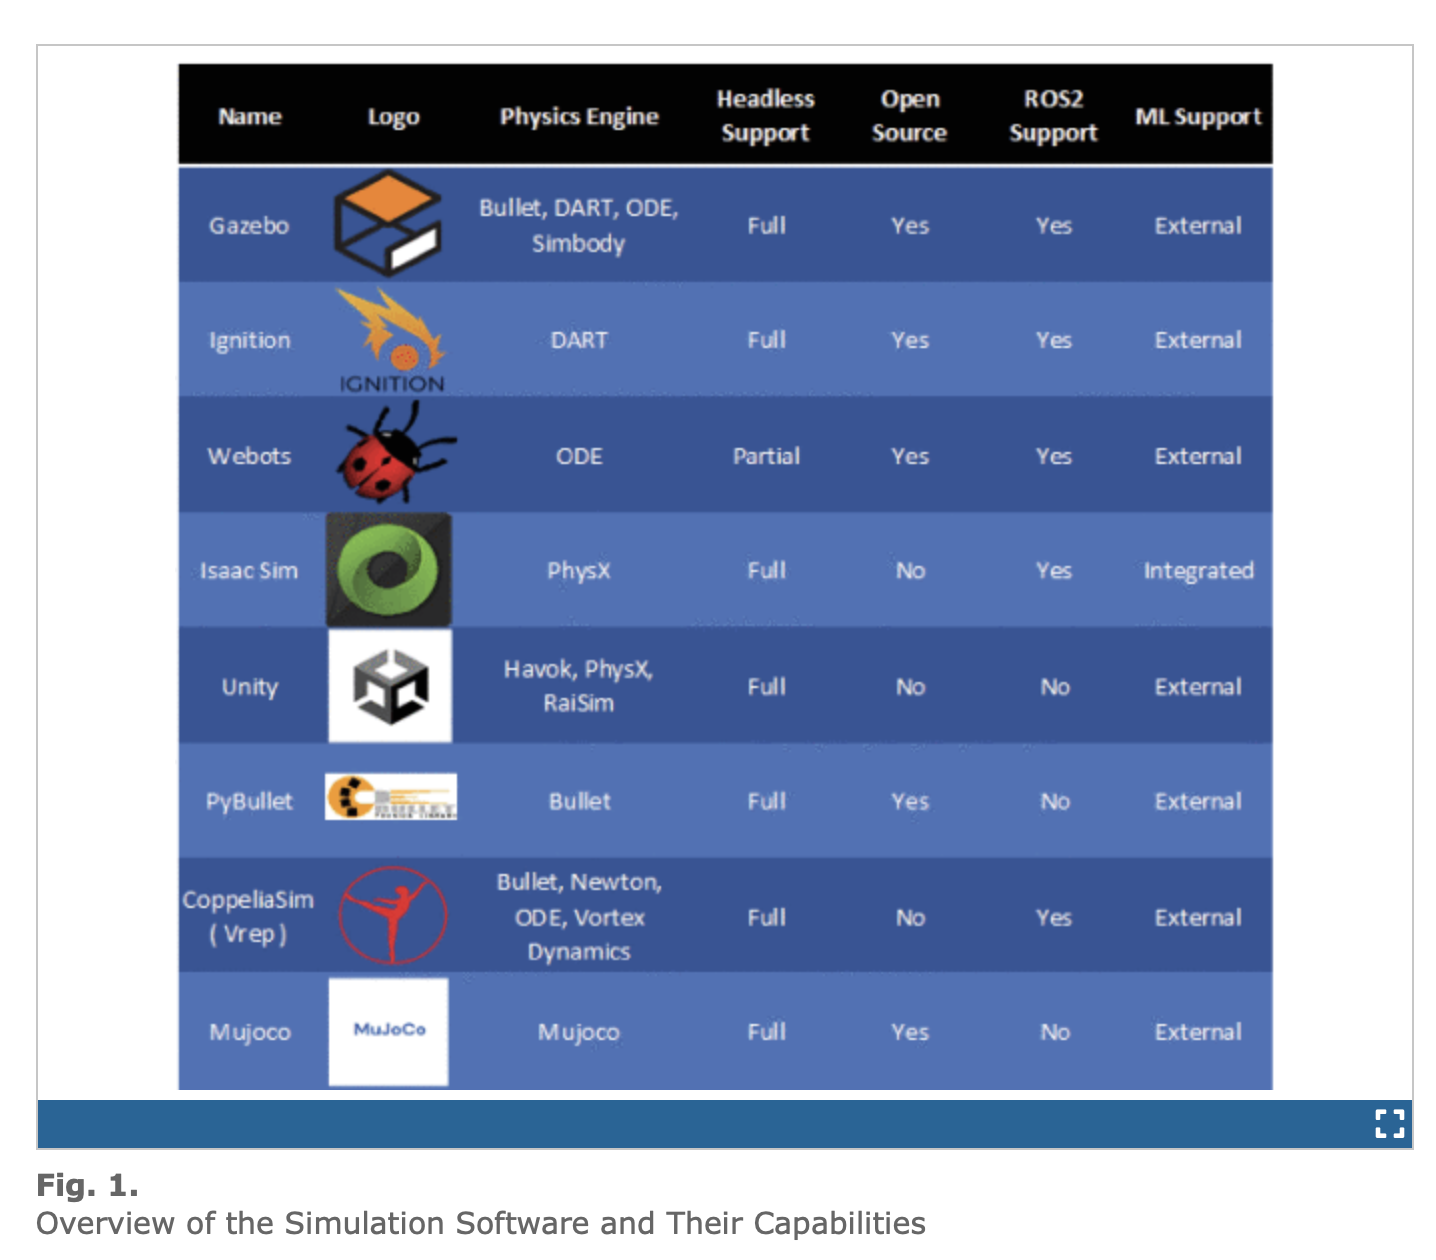


- To watch the video of the robile simulation in IsaacSim performing collision avoidance, please visit:
[Robile in IsaacSim](https://drive.google.com/file/d/1n-DboiIQcm1qe0gsxumDIwogmwEIMnI1/view?usp=drive_link)


References:

[1] Audonnet FP, Hamilton A, Aragon-Camarasa G. A Systematic Comparison of Simulation Software for Robotic Arm Manipulation using ROS2. In2022 22nd International Conference on Control, Automation and Systems (ICCAS) 2022 Nov 27 (pp. 755-762). IEEE.